# PART -2 Modelling

# *Importing the required libraries and our Dataset*

In [1]:
# data 
import pandas as pd
import numpy as np
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('titanic.csv')
dataset.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [7]:
dataset.drop('Unnamed: 0', axis =1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# *Creating Dummy Values in colums for our categorical variables - One Hot Encoding*

In [9]:
X = dataset[ ['Pclass','Sex', 'Age', 'SibSp', 'Parch' , 'Embarked' ]]

In [10]:
sex = dataset['Sex']
sex = pd.get_dummies(sex, drop_first=True )

In [11]:
pclass = dataset['Pclass']
pclass = pd.get_dummies(pclass, drop_first=True)

In [12]:
sibsp = dataset['SibSp']
sibsp = pd.get_dummies(sibsp, drop_first=True)

In [13]:
parch = dataset['Parch']
parch = pd.get_dummies(parch, drop_first=True)

In [16]:
embarked = dataset['Embarked']
embarked = pd.get_dummies(embarked, drop_first=True)

In [17]:
age = dataset['Age']

In [21]:
X = pd.concat([age, embarked, parch, sibsp, pclass, sex] ,  axis=1)
y = dataset['Survived']

In [22]:
X

,Age,Q,S,1,2,3,4,5,6,1,2,3,4,5,8,2,3,male
0,22.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,38.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,35.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,35.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,27.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
885,19.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
886,24.0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
887,26.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# *Splitting our Data into Train & Tests*

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# *Creating different Models and predicting for accuracy*

## *1. Logistic Regression*

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

log_model = LogisticRegression()

log_model.fit(X_train,y_train)

y_pred = log_model.predict(X_test)

y_pred

C:\Users\KIIT\anaconda3\envs\my_personal_lab\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [33]:
confusion_matrix(y_test , y_pred)

array([[144,  23],
       [ 29,  71]], dtype=int64)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       167
           1       0.76      0.71      0.73       100

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



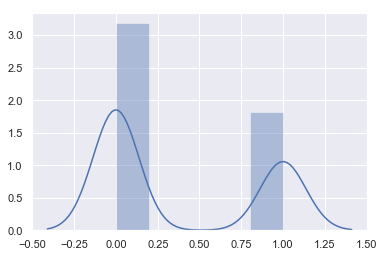

In [36]:
sns.set()
sns.distplot((y_test,y_pred))

## *2. KNN Classification - Checking Accuracy for different values for k to find the best fit*

In [35]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

for i in list(range(1,25)):
    KNN_model = KNeighborsClassifier(n_neighbors=i)
    KNN_model.fit(X_train, y_train)
    prediction = KNN_model.predict(X_test)
    print('The accuracy of KNN with K value ', i , '=', metrics.accuracy_score(prediction,y_test))

The accuracy of KNN with K value  1 = 0.7415730337078652
The accuracy of KNN with K value  2 = 0.7415730337078652
The accuracy of KNN with K value  3 = 0.7602996254681648
The accuracy of KNN with K value  4 = 0.7490636704119851
The accuracy of KNN with K value  5 = 0.7490636704119851
The accuracy of KNN with K value  6 = 0.7453183520599251
The accuracy of KNN with K value  7 = 0.7790262172284644
The accuracy of KNN with K value  8 = 0.7715355805243446
The accuracy of KNN with K value  9 = 0.7640449438202247
The accuracy of KNN with K value  10 = 0.7565543071161048
The accuracy of KNN with K value  11 = 0.7528089887640449
The accuracy of KNN with K value  12 = 0.7453183520599251
The accuracy of KNN with K value  13 = 0.7677902621722846
The accuracy of KNN with K value  14 = 0.7303370786516854
The accuracy of KNN with K value  15 = 0.7565543071161048
The accuracy of KNN with K value  16 = 0.7153558052434457
The accuracy of KNN with K value  17 = 0.7078651685393258
The accuracy of KNN wit

## *3. Decision Tree*

In [45]:
from sklearn.tree import DecisionTreeClassifier

Dec_tree=DecisionTreeClassifier(max_depth=4,random_state=5)
Dec_tree = Dec_tree.fit(X_train,y_train)
prediction1 = Dec_tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, prediction1))

Accuracy: 0.8014981273408239


## *4. Random Forest* 

In [47]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(n_estimators=50, max_features='sqrt',max_depth=6,random_state=10)
ranfor = ranfor.fit(X_train,y_train)

prediction2 = Dec_tree.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, prediction2))

Accuracy: 0.8014981273408239
